# MID bootcamp project

# Import libary

In [46]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [47]:
data = pd.read_csv('women_clothing_ecommerce_sales.csv')
data.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [48]:
data.shape

(527, 8)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [50]:
data.count()

order_id      527
order_date    527
sku           527
color         527
size          490
unit_price    527
quantity      527
revenue       527
dtype: int64

In [51]:
data.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [52]:
uniqueValues = data.nunique()
print(uniqueValues)

order_id      273
order_date    444
sku            24
color          39
size            9
unit_price     35
quantity        2
revenue        38
dtype: int64


# Data cleaning

#### droping order_id / sku

In [53]:

data = data.drop(columns=['order_id'], axis=0)


In [54]:
data['sku'].value_counts(dropna = True)

799      283
708       99
bobo      16
239       16
77        16
9699      16
89        13
3799       9
79         9
1719       8
218        7
3081       5
61399      4
2499       4
339        4
127        3
897        3
8499       3
229        2
1499       2
539        2
628        1
29         1
439        1
Name: sku, dtype: int64

In [55]:
data = data.drop(columns=['sku'], axis=0)

In [56]:
data

,order_date,color,size,unit_price,quantity,revenue
0,2022/6/1 16:05:00,Dark Blue,2XL,298,1,298
1,2022/6/1 16:05:00,Dark Blue,2XL,258,1,258
2,2022/6/10 17:03:00,Cream,One Size,228,1,228
3,2022/6/10 19:59:00,Dark Blue,XL,264,1,264
4,2022/6/11 11:42:00,Dark Blue,M,264,1,264
...,...,...,...,...,...,...
522,2022/9/9 6:27:00,Dark Blue,M,265,1,265
523,2022/9/9 7:18:00,Dark Blue,4XL,278,1,278
524,2022/9/9 7:22:00,Dark Blue,M,265,1,265
525,2022/9/9 8:25:00,Dark Blue,L,265,1,265


#### Cleaning NaNs

In [57]:
data.isnull().sum()/len(data)

order_date    0.000000
color         0.000000
size          0.070209
unit_price    0.000000
quantity      0.000000
revenue       0.000000
dtype: float64

In [58]:
data['size'].value_counts(dropna=False)

XL          164
M            92
L            91
One Size     45
2XL          43
3XL          40
NaN          37
4XL           9
One SIze      5
S             1
Name: size, dtype: int64

In [59]:
data[data['size'].isna()]

,order_date,color,size,unit_price,quantity,revenue
9,2022/6/11 22:53:00,Black,NaN,258,1,258
20,2022/6/15 13:36:00,B,NaN,258,1,258
21,2022/6/15 13:36:00,C,NaN,258,1,258
22,2022/6/15 13:36:00,D,NaN,258,1,258
23,2022/6/15 13:36:00,E,NaN,258,1,258
24,2022/6/15 13:36:00,A,NaN,288,1,288
66,2022/6/30 12:26:00,Rust,NaN,258,1,258
68,2022/6/5 7:18:00,B,NaN,258,1,258
81,2022/6/6 3:56:00,B,NaN,258,1,258
82,2022/6/6 3:56:00,D,NaN,258,1,258


In [60]:
data['size']= data['size'].fillna('others')

In [61]:
data.isna().sum()

order_date    0
color         0
size          0
unit_price    0
quantity      0
revenue       0
dtype: int64

In [62]:

def cleaning(s):
    s= s.replace('One SIze', 'One Size')
    return  s

cleaning('One SIze')

'One Size'

In [63]:
data['size']= data['size'].apply(cleaning)

#### Changing datetime

In [64]:
data['order_date']= pd.to_datetime(data['order_date'])

data["day"] = data['order_date'].dt.day
data["month"] = data['order_date'].dt.month
data["year"] = data['order_date'].dt.year




In [137]:
data.to_csv('womans_cloth.csv',index= False)


#### Groupby 

In [65]:
data.groupby(['month']).agg({'revenue':sum})

,revenue
month,
6,25259
7,32175
8,42513
9,46572


In [66]:
data.groupby(['size']).agg({'revenue':sum})

,revenue
size,
2XL,12422
3XL,11301
4XL,3205
L,25362
M,25755
One Size,12783
S,227
XL,45868
others,9596


In [67]:
data.groupby('color').aggregate({'size':'count','revenue':['min','max', 'sum']})


size revenue             
                count     min  max     sum
color                                     
920 Navy blue       1     227  227     227
922 Army green      1     207  207     207
922 Black           1     207  207     207
A                   3     239  288     815
B                   6     239  258    1491
Black              14     258  576    4428
Black Stripes       1     248  248     248
Blue                4     191  268     878
Blue Stripes        2     248  248     496
Brown               3     198  254     691
C                   4     239  258     975
Cornflower Blue     1     198  198     198
Cream               2     228  382     610
D                   2     258  258     516
Dark Blue         397     245  899  112364
Dark Wash           5     238  278    1311
E                   1     258  258     258
Gray                3     259  278     815
Gray Stripes        1     255  255     255
Green               2     245  254     499
Grey Wash           9     246  268    2390
Light Blue         26     198  315    7337
Light Gray          1     228  228     228
Light Wash          1     238  238     238
Maroon              1     191  191     191
Matcha              2     228  228     456
Mid Wash            8     232  278    2043
Midnight Blue       2     198  198     396
Mocha               1     288  288     288
Mustard             1     245  245     245
Navy Blue           7     191  288    1693
Pink                1     228  228     228
Red Orange          1     228  228     228
Rust                3     245  278     781
Skintone            1     278  278     278
Thin Black          1     268  268     268
Thin Blue           3     249  268     785
White               3     206  245     679
Yellow              1     278  278     278

In [68]:
data.groupby(['month', 'color']).aggregate({'size':'count','revenue':['min','max', 'sum']})



size revenue          
                     count     min  max  sum
month color                                 
6     922 Army green     1     207  207  207
      922 Black          1     207  207  207
      A                  2     288  288  576
      B                  3     258  258  774
      Black              1     258  258  258
...                    ...     ...  ...  ...
9     Pink               1     228  228  228
      Red Orange         1     228  228  228
      Rust               1     278  278  278
      White              2     206  228  434
      Yellow             1     278  278  278

[75 rows x 4 columns]

In [69]:
data['color'].value_counts()

Dark Blue          397
Light Blue          26
Black               14
Grey Wash            9
Mid Wash             8
Navy Blue            7
B                    6
Dark Wash            5
Blue                 4
C                    4
Brown                3
White                3
Gray                 3
Rust                 3
Thin Blue            3
A                    3
Cream                2
Midnight Blue        2
Blue Stripes         2
D                    2
Green                2
Matcha               2
Yellow               1
Cornflower Blue      1
Skintone             1
Mocha                1
Maroon               1
Pink                 1
922 Army green       1
Mustard              1
Black Stripes        1
Light Wash           1
920 Navy blue        1
Gray Stripes         1
922 Black            1
Thin Black           1
E                    1
Light Gray           1
Red Orange           1
Name: color, dtype: int64

In [70]:
def clean(x):
    
    if x in ['Mid Wash', 'Navy Blue', 'Blue', 'Thin Blue', 'Midnight Blue', 'Blue Stripes', '920 Navy blue','Dark Blue']:
        return  'Dark Blue' 
    elif x in ['Grey Wash', 'Gray', 'Gray Stripes','Light Gray']:
        return 'Gray'
    elif x in ['922 Black', 'Black Stripes', 'Thin Black', 'Dark Wash']:
        return 'Black'
    elif x in ['Light Blue', 'Cornflower Blue','Light Wash']:
        return 'Light Blue'
    else: 
        return 'other'


In [72]:
#clean(data['color'])

In [73]:
data['color']= data['color'].apply(clean)

In [74]:
data['color'].value_counts()

Dark Blue     424
other          53
Light Blue     28
Gray           14
Black           8
Name: color, dtype: int64

### Numerical

In [75]:
# Which columns are numerical?

numerical = data.select_dtypes(include= np.number)
numerical




,unit_price,quantity,revenue,day,month,year
0,298,1,298,1,6,2022
1,258,1,258,1,6,2022
2,228,1,228,10,6,2022
3,264,1,264,10,6,2022
4,264,1,264,11,6,2022
...,...,...,...,...,...,...
522,265,1,265,9,9,2022
523,278,1,278,9,9,2022
524,265,1,265,9,9,2022
525,265,1,265,9,9,2022


### Categorical

In [76]:
#Which columns are categorical?

categoricals = data.select_dtypes(include= object)
categoricals




,color,size
0,Dark Blue,2XL
1,Dark Blue,2XL
2,other,One Size
3,Dark Blue,XL
4,Dark Blue,M
...,...,...
522,Dark Blue,M
523,Dark Blue,4XL
524,Dark Blue,M
525,Dark Blue,L


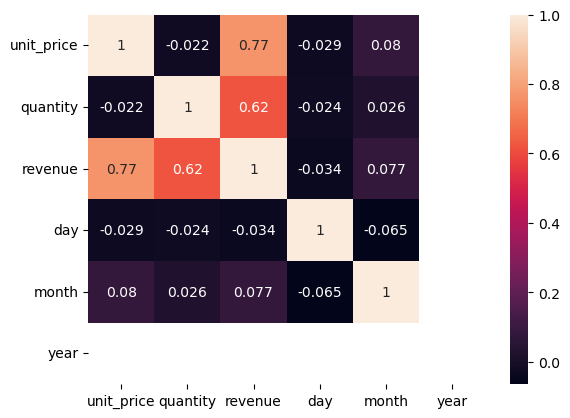

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns 

correlations_matrix =data.corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Processing Data

In [108]:
# X-y split
import math
from sklearn import linear_model
y = data['revenue']
X = data.drop(['revenue', 'order_date', 'year', 'quantity'], axis=1)
X['day'] = X['day'].astype(object)
X['month'] = X['month'].astype(object)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(421, 5)
(106, 5)
(421,)
(106,)


In [111]:
X_train.head()

,color,size,unit_price,day,month
155,Dark Blue,XL,298,26,7
454,Dark Blue,4XL,286,28,9
421,Dark Blue,L,288,19,9
326,other,others,239,4,8
504,Dark Blue,M,288,8,9


In [112]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

In [113]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

# Normalize (numerical)

In [114]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,421.0,274.494062,37.448416,191.0,266.0,278.0,288.0,899.0


In [115]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_train_num)

X_normalized = MinMaxtransformer.transform(X_train_num)
X_train_normalized = pd.DataFrame(X_normalized,columns=X_train_num.columns)
X_train_normalized.head()


,unit_price
0,0.151130
1,0.134181
2,0.137006
3,0.067797
4,0.137006


In [116]:
X_normalized = MinMaxtransformer.transform(X_test_num)
X_test_normalized = pd.DataFrame(X_normalized,columns=X_test_num.columns)
X_test_normalized.head()


,unit_price
0,0.137006
1,0.137006
2,0.122881
3,0.151130
4,0.148305


In [117]:
X_train_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,421.0,0.117929,0.052893,0.0,0.105932,0.122881,0.137006,1.0


# One Hot/Label Encoding (categorical)

In [118]:
X_train_cat.head()

,color,size,day,month
155,Dark Blue,XL,26,7
454,Dark Blue,4XL,28,9
421,Dark Blue,L,19,9
326,other,others,4,8
504,Dark Blue,M,8,9


In [119]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features = X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()

,color_Dark Blue,color_Gray,color_Light Blue,color_other,size_3XL,size_4XL,size_L,size_M,size_One Size,size_S,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_7,month_8,month_9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
cols = encoder.get_feature_names_out(input_features = X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()

,color_Dark Blue,color_Gray,color_Light Blue,color_other,size_3XL,size_4XL,size_L,size_M,size_One Size,size_S,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_7,month_8,month_9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [121]:
y_train.reset_index(drop= True, inplace= True)

In [122]:
y_test.reset_index(drop= True, inplace= True)

# Concat DataFrames




In [123]:
X_train = pd.concat([X_train_normalized, X_train_cat_encode], axis=1) 

In [124]:
X_train.head()

,unit_price,color_Dark Blue,color_Gray,color_Light Blue,color_other,size_3XL,size_4XL,size_L,size_M,size_One Size,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_7,month_8,month_9
0,0.151130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.134181,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.137006,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.067797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.137006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
X_test = pd.concat([X_test_normalized, X_test_cat_encode], axis=1) 

In [126]:
X_test

,unit_price,color_Dark Blue,color_Gray,color_Light Blue,color_other,size_3XL,size_4XL,size_L,size_M,size_One Size,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_7,month_8,month_9
0,0.137006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.137006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.122881,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.151130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.148305,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.137006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102,0.052260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.122881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
104,0.137006,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Linear Regression

In [127]:
X_train.head()

,unit_price,color_Dark Blue,color_Gray,color_Light Blue,color_other,size_3XL,size_4XL,size_L,size_M,size_One Size,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_7,month_8,month_9
0,0.151130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.134181,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.137006,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.067797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.137006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [128]:
y_train.head()

0    298
1    286
2    288
3    239
4    288
Name: revenue, dtype: int64

In [129]:
# train/fit our model 
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

# Model Validation

In [130]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.6596133412419478

In [131]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.19520450561854996

In [132]:
y_test[:5]

0    288
1    288
2    278
3    298
4    296
Name: revenue, dtype: int64

In [133]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

762.953004818814

In [134]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

27.62160395087175

In [135]:
y_test.mean()

279.37735849056605

In [ ]:
## Prediction of quantity